In [211]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif, SelectKBest
from keras.models import Sequential
from keras.layers import LSTM, Dense

## Read data file

In [212]:
data = pd.read_csv('./wine.csv')

## Preprocessing

In [213]:
le =LabelEncoder()

le.fit(data['color'])

data['color']=le.transform(data['color'])


## 2. Use simple model to solve problem

In [214]:
X = data.drop('quality', axis=1)
y = data['quality']

In [215]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Multinomial Naive Bayes

In [216]:
model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))


accuracy :  0.3513846153846154


## 5. Improve the accuracy

### Feature selection

<Axes: >

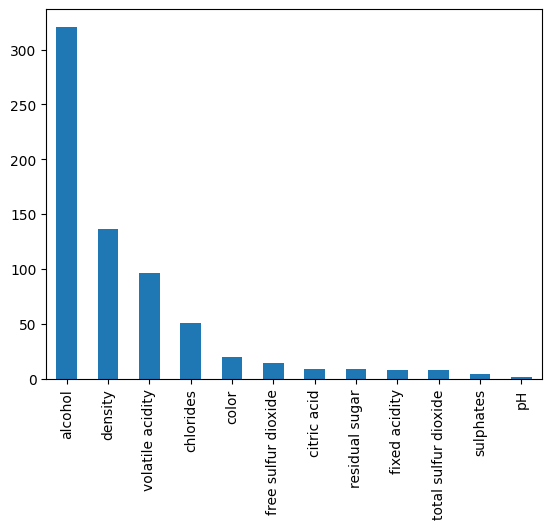

In [217]:
X = data.drop('quality', axis=1)
y = data['quality']

score = f_classif(X, y)

value = pd.Series(score[0], index=X.columns)
value.sort_values(ascending=False, inplace=True)
value.plot.bar()


### Select best 6 feature

In [218]:
selector = SelectKBest(f_classif, k = 6)
selector.fit(X,y)
cols_name = selector.get_support(indices=True)

X_train_new = X_train.iloc[:,cols_name]
X_test_new = X_test.iloc[:,cols_name]

### Evaluate the result after feature selection

In [219]:
model = MultinomialNB()

model.fit(X_train_new, y_train)

y_pred = model.predict(X_test_new)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.4473846153846154


## 3 . Recurrent Neutral Network

In [220]:
X_value = data.drop('quality', axis=1).values
y_value = data['quality'].values

In [221]:
# label_encoder = LabelEncoder()

# y = label_encoder.fit_transform(y)

In [222]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_value, y_value, test_size=0.2, random_state=42)

In [223]:
X_train_n = X_train_n.reshape((X_train_n.shape[0], 1, X_train_n.shape[1]))
X_test_n = X_test_n.reshape((X_test_n.shape[0], 1, X_test_n.shape[1]))

In [224]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(10, activation='softmax'))

In [225]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [226]:
model.fit(X_train_n, y_train_n, epochs=50, batch_size=32, validation_data=(X_test_n, y_test_n))

Epoch 1/50


163/163 [==============================] - 5s 10ms/step - loss: 1.4091 - accuracy: 0.4272 - val_loss: 1.2594 - val_accuracy: 0.4454
Epoch 2/50
163/163 [==============================] - 1s 6ms/step - loss: 1.2767 - accuracy: 0.4331 - val_loss: 1.2357 - val_accuracy: 0.4438
Epoch 3/50
163/163 [==============================] - 1s 6ms/step - loss: 1.2295 - accuracy: 0.4510 - val_loss: 1.1500 - val_accuracy: 0.4615
Epoch 4/50
163/163 [==============================] - 1s 5ms/step - loss: 1.1748 - accuracy: 0.4857 - val_loss: 1.0940 - val_accuracy: 0.4869
Epoch 5/50
163/163 [==============================] - 1s 6ms/step - loss: 1.1384 - accuracy: 0.5038 - val_loss: 1.0856 - val_accuracy: 0.5131
Epoch 6/50
163/163 [==============================] - 1s 5ms/step - loss: 1.1366 - accuracy: 0.5105 - val_loss: 1.0639 - val_accuracy: 0.5131
Epoch 7/50
163/163 [==============================] - 1s 5ms/step - loss: 1.1306 - accuracy: 0.5124 - val_loss: 1.0679 - val_accuracy: 0.5062
Epoch 8/50
163/1

In [227]:
loss, accuracy = model.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

 1/41 [..............................] - ETA: 0s - loss: 1.2547 - accuracy: 0.4375

41/41 [==============================] - 0s 3ms/step - loss: 1.0130 - accuracy: 0.5408
Test Loss: 1.0130
Test Accuracy: 0.5408


## 4. Over fitting

Để giảm overfitting , ta có thể giảm độ phức tạp của mô hình bằng cách giảm hidden layer , cũng như số neuron trên 1 layer, giảm epochs

Ở đây , ta sẽ bớt đi một hidden layer ở giữa

In [228]:
model_over = Sequential()
model_over.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model_over.add(LSTM(64))
model_over.add(Dense(10, activation='softmax'))

In [229]:
model_over.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [230]:
model_over.fit(X_train_n, y_train_n, epochs=25, batch_size=32, validation_data=(X_test_n, y_test_n))

Epoch 1/25


163/163 [==============================] - 4s 9ms/step - loss: 1.3845 - accuracy: 0.4277 - val_loss: 1.2361 - val_accuracy: 0.4462
Epoch 2/25
163/163 [==============================] - 1s 4ms/step - loss: 1.2491 - accuracy: 0.4462 - val_loss: 1.1937 - val_accuracy: 0.4562
Epoch 3/25
163/163 [==============================] - 1s 4ms/step - loss: 1.1926 - accuracy: 0.4757 - val_loss: 1.1384 - val_accuracy: 0.4623
Epoch 4/25
163/163 [==============================] - 1s 4ms/step - loss: 1.1574 - accuracy: 0.4903 - val_loss: 1.0971 - val_accuracy: 0.4869
Epoch 5/25
163/163 [==============================] - 1s 4ms/step - loss: 1.1334 - accuracy: 0.5047 - val_loss: 1.0736 - val_accuracy: 0.5054
Epoch 6/25
163/163 [==============================] - 1s 4ms/step - loss: 1.1149 - accuracy: 0.5114 - val_loss: 1.0694 - val_accuracy: 0.5269
Epoch 7/25
163/163 [==============================] - 1s 5ms/step - loss: 1.1119 - accuracy: 0.5199 - val_loss: 1.0713 - val_accuracy: 0.5246
Epoch 8/25
163/16

### Accuracy sau khi tránh overfitting đã giảm

In [231]:
loss, accuracy = model_over.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

 1/41 [..............................] - ETA: 1s - loss: 1.3543 - accuracy: 0.4375

41/41 [==============================] - 0s 3ms/step - loss: 1.0426 - accuracy: 0.5269
Test Loss: 1.0426
Test Accuracy: 0.5269


## 5 . Improve model

In [232]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(10, activation='softmax'))

In [233]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [234]:
model.fit(X_train_n, y_train_n, epochs=75, batch_size=256, validation_data=(X_test_n, y_test_n))

Epoch 1/75


21/21 [==============================] - 5s 60ms/step - loss: 2.0231 - accuracy: 0.4124 - val_loss: 1.4566 - val_accuracy: 0.4454
Epoch 2/75
21/21 [==============================] - 0s 13ms/step - loss: 1.3599 - accuracy: 0.4214 - val_loss: 1.2774 - val_accuracy: 0.4454
Epoch 3/75
21/21 [==============================] - 0s 11ms/step - loss: 1.3002 - accuracy: 0.4343 - val_loss: 1.2610 - val_accuracy: 0.4454
Epoch 4/75
21/21 [==============================] - 0s 11ms/step - loss: 1.2870 - accuracy: 0.4343 - val_loss: 1.2545 - val_accuracy: 0.4454
Epoch 5/75
21/21 [==============================] - 0s 11ms/step - loss: 1.2835 - accuracy: 0.4349 - val_loss: 1.2510 - val_accuracy: 0.4454
Epoch 6/75
21/21 [==============================] - 0s 11ms/step - loss: 1.2794 - accuracy: 0.4341 - val_loss: 1.2483 - val_accuracy: 0.4446
Epoch 7/75
21/21 [==============================] - 0s 11ms/step - loss: 1.2746 - accuracy: 0.4370 - val_loss: 1.2473 - val_accuracy: 0.4262
Epoch 8/75
21/21 [======

In [235]:
loss, accuracy = model.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 4ms/step - loss: 1.0051 - accuracy: 0.5446
Test Loss: 1.0051
Test Accuracy: 0.5446
